## Demonstration of Clustering Analysis
Let's proceed with the clustering case study using the "penguins" dataset. We'll demonstrate three types of clustering methods: 1) partitioning methods, 2) hierarchical methods, and 3) density-based methods. we will visualize the clustering results and compare them using the Silhouette Score.

## Setup
Load and Explore the "Penguins" Dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the "penguins" dataset from Seaborn
penguins = sns.load_dataset('penguins')

# Explore the basic information about the dataset
print(penguins.head())
print(penguins.info())
print(penguins.describe())

# Drop rows with missing values
penguins = penguins.dropna()

# Convert categorical variables to numerical representations using one-hot encoding
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)

# Extract the feature columns for clustering
X = penguins.drop('species_Chinstrap', axis=1)


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_

## Clustering with Partitioning Methods (e.g., K-means)

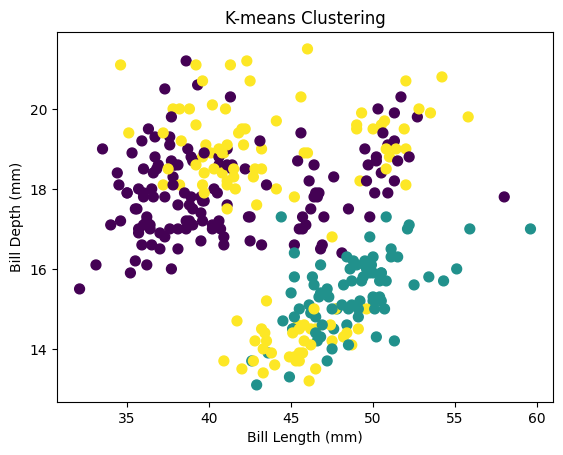

Silhouette Score (K-means): 0.5589


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualize K-means clustering results
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Calculate the Silhouette Score for K-means clustering
silhouette_score_kmeans = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score (K-means): {silhouette_score_kmeans:.4f}")


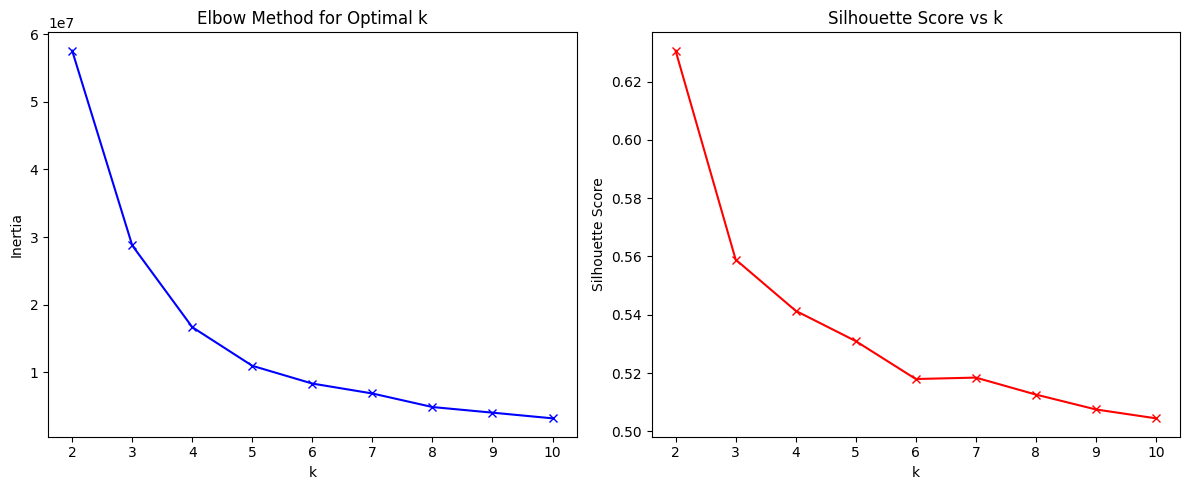


Inertia values:
k=2: 57586033.30
k=3: 28761866.63
k=4: 16655642.10
k=5: 10934209.03
k=6: 8303366.79
k=7: 6835006.60
k=8: 4828805.32
k=9: 3995696.93
k=10: 3154911.29

Silhouette scores:
k=2: 0.6306
k=3: 0.5589
k=4: 0.5414
k=5: 0.5310
k=6: 0.5179
k=7: 0.5184
k=8: 0.5126
k=9: 0.5075
k=10: 0.5045

Optimal number of clusters based on Silhouette score: 2


In [ ]:
# Calculate inertia for different k values
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Print the results
print("\nInertia values:")
for k, inertia in zip(k_range, inertias):
    print(f"k={k}: {inertia:.2f}")

print("\nSilhouette scores:")
for k, score in zip(k_range, silhouette_scores):
    print(f"k={k}: {score:.4f}")

# Find optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette score: {optimal_k}")

## Clustering with Hierarchical Methods (e.g., Agglomerative Clustering)

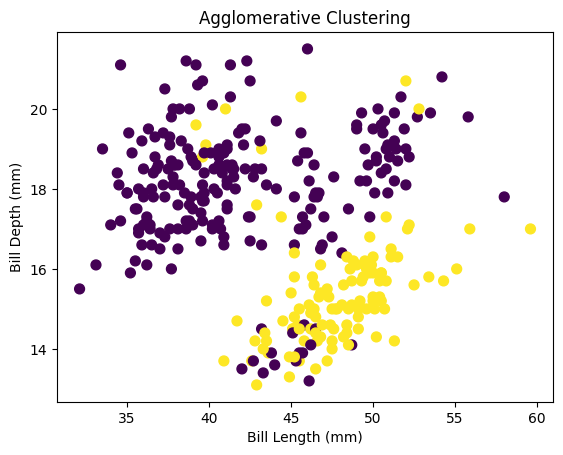

Silhouette Score (Agglomerative Clustering): 0.6289


In [13]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative_labels = agglomerative.fit_predict(X)

# Visualize Agglomerative Clustering results
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=agglomerative_labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Calculate the Silhouette Score for Agglomerative Clustering
silhouette_score_agglomerative = silhouette_score(X, agglomerative_labels)
print(f"Silhouette Score (Agglomerative Clustering): {silhouette_score_agglomerative:.4f}")


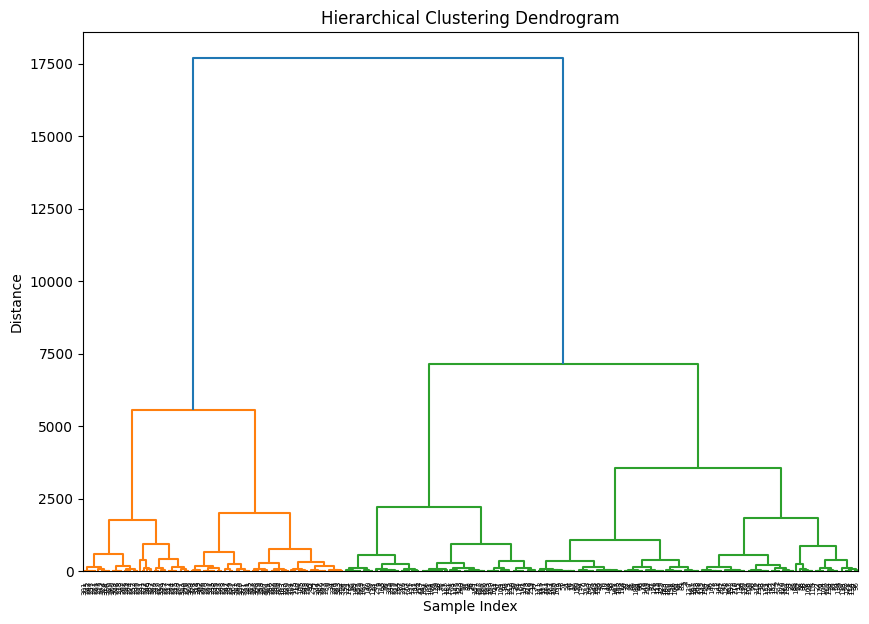

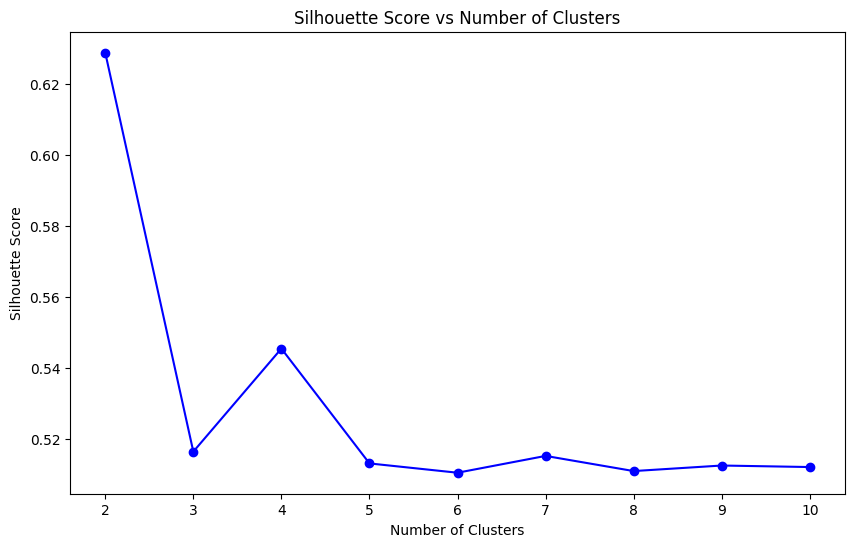

Optimal number of clusters: 2


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Function to plot dendrogram
def plot_dendrogram(X):
    # Create linkage matrix
    linkage_matrix = linkage(X, method='ward')
    
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Function to evaluate different numbers of clusters using silhouette score
def evaluate_clusters(X, max_clusters=10):
    n_clusters_range = range(2, max_clusters + 1)
    silhouette_scores = []
    
    for n_clusters in n_clusters_range:
        clusterer = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(n_clusters_range, silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.show()
    
    # Find optimal number of clusters
    optimal_clusters = n_clusters_range[np.argmax(silhouette_scores)]
    print(f"Optimal number of clusters: {optimal_clusters}")
    return optimal_clusters

# Use both methods
plot_dendrogram(X)
optimal_n = evaluate_clusters(X)

# Apply clustering with optimal number
optimal_clustering = AgglomerativeClustering(n_clusters=optimal_n)
labels = optimal_clustering.fit_predict(X)

## Clustering with Density-Based Methods (e.g., DBSCAN)

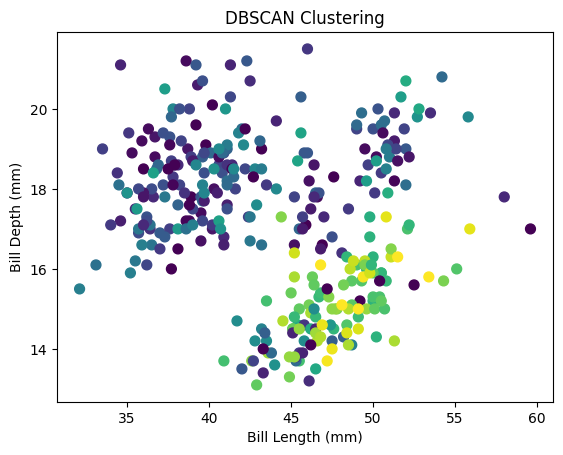

Silhouette Score (DBSCAN): 0.6150


In [23]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=20, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)

# Visualize DBSCAN clustering results
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Calculate the Silhouette Score for DBSCAN clustering
silhouette_score_dbscan = silhouette_score(X, dbscan_labels)
print(f"Silhouette Score (DBSCAN): {silhouette_score_dbscan:.4f}")

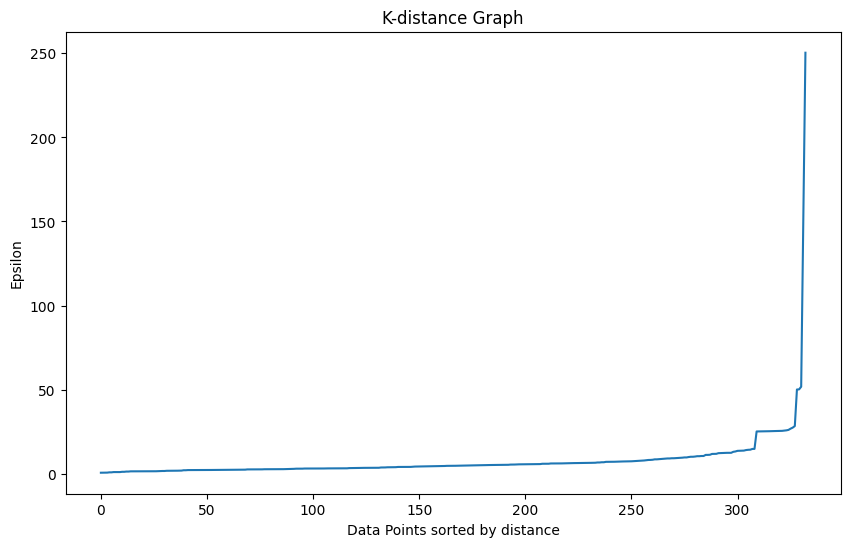

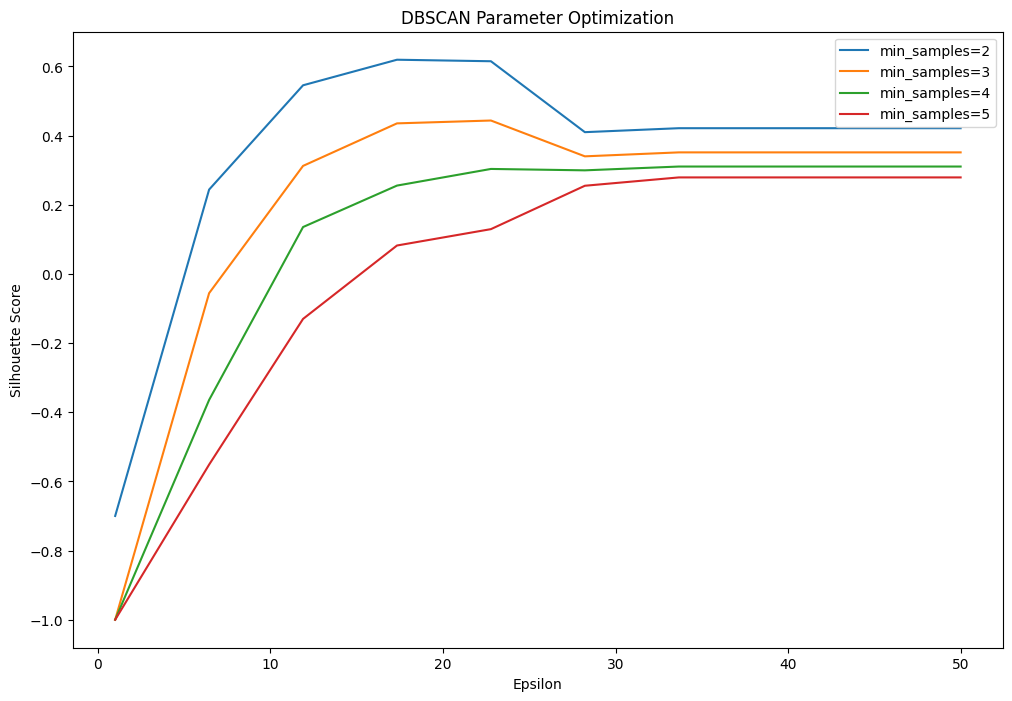

Best parameters:
eps: 17.33
min_samples: 2
silhouette score: 0.619


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def find_optimal_dbscan_params(X):
    # 1. Find optimal eps using KNN distance plot
    neighbors = NearestNeighbors(n_neighbors=2)
    neighbors_fit = neighbors.fit(X)
    distances, _ = neighbors_fit.kneighbors(X)
    distances = np.sort(distances[:, 1])
    
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.title('K-distance Graph')
    plt.xlabel('Data Points sorted by distance')
    plt.ylabel('Epsilon')
    plt.show()
    
    # 2. Test different combinations
    eps_range = np.linspace(1, 50, 10)
    min_samples_range = range(2, 6)
    scores = []
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            
            # Skip if all points are noise (-1)
            if len(np.unique(labels)) < 2:
                scores.append((eps, min_samples, -1))
                continue
                
            try:
                score = silhouette_score(X, labels)
                scores.append((eps, min_samples, score))
            except:
                scores.append((eps, min_samples, -1))
    
    # Convert to numpy array for easier handling
    scores = np.array(scores)
    
    # 3. Visualize results
    plt.figure(figsize=(12, 8))
    for min_samples in min_samples_range:
        mask = scores[:, 1] == min_samples
        plt.plot(scores[mask, 0], scores[mask, 2], 
                label=f'min_samples={min_samples}')
    
    plt.xlabel('Epsilon')
    plt.ylabel('Silhouette Score')
    plt.title('DBSCAN Parameter Optimization')
    plt.legend()
    plt.show()
    
    # 4. Find best parameters
    best_idx = np.argmax(scores[:, 2])
    best_eps, best_min_samples, best_score = scores[best_idx]
    
    print(f"Best parameters:")
    print(f"eps: {best_eps:.2f}")
    print(f"min_samples: {int(best_min_samples)}")
    print(f"silhouette score: {best_score:.3f}")
    
    return best_eps, best_min_samples

# Find optimal parameters
optimal_eps, optimal_min_samples = find_optimal_dbscan_params(X)

# Apply DBSCAN with optimal parameters
optimal_dbscan = DBSCAN(eps=optimal_eps, min_samples=int(optimal_min_samples))
labels = optimal_dbscan.fit_predict(X)

## Compare the Results and Conclusion

In [15]:
# Compare the Silhouette Scores
silhouette_scores = [silhouette_score_kmeans, silhouette_score_agglomerative, silhouette_score_dbscan]
method_names = ['K-means', 'Agglomerative', 'DBSCAN']

for i, score in enumerate(silhouette_scores):
    print(f"Silhouette Score ({method_names[i]}): {score:.4f}")

# Summarize and compare the clustering results
# You can summarize and compare the clustering results based on the visualization and silhouette scores obtained from each method.
# Discuss the strengths and limitations of each clustering method in the context of the "penguins" dataset.

# Conclusion
# Summarize the findings and insights gained from the case study, and discuss potential applications or future work.


Silhouette Score (K-means): 0.5589
Silhouette Score (Agglomerative): 0.6289
Silhouette Score (DBSCAN): 0.6150
